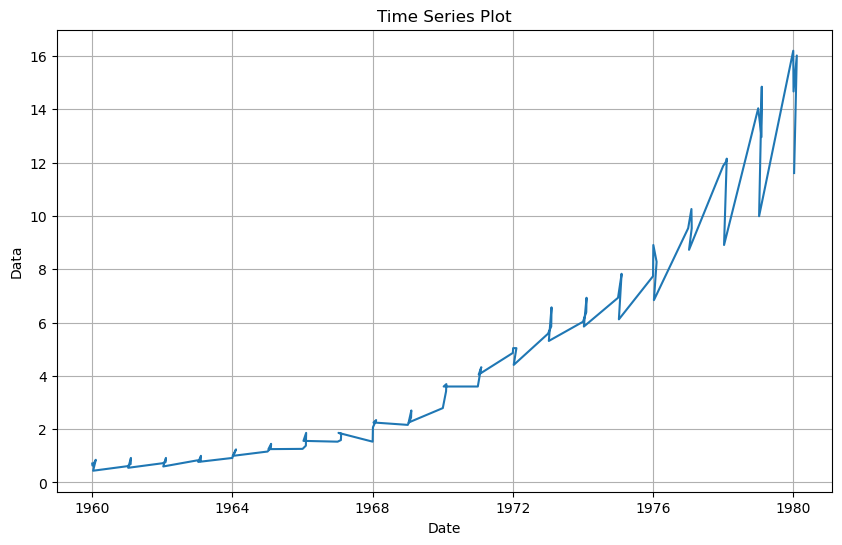

ADF Statistic: 2.7420165734574735
p-value: 1.0
Critical Values: {'1%': -3.524624466842421, '5%': -2.9026070739026064, '10%': -2.5886785262345677}


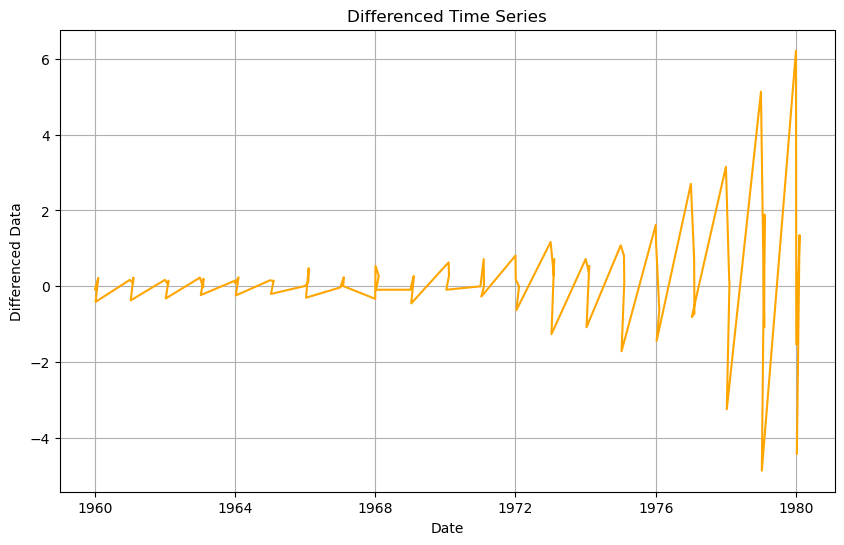

ADF Statistic (Differenced Data): -0.40740976363804116
p-value (Differenced Data): 0.9088542416911313
Critical Values (Differenced Data): {'1%': -3.524624466842421, '5%': -2.9026070739026064, '10%': -2.5886785262345677}


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Step 1: Load the data
file_path =  r'C:\Users\MrLaptop\Desktop\jj.csv'
data = pd.read_csv(file_path)

# Step 2: Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

# Step 3: Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['data'], label='Original Data')
plt.xlabel('Date')
plt.ylabel('Data')
plt.title('Time Series Plot')
plt.grid(True)
plt.show()

# Step 4: Perform Augmented Dickey-Fuller test on original data
adf_result = adfuller(data['data'])
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]
print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print(f"Critical Values: {critical_values}")

# Step 5: Differencing the data to make it stationary
data['diff'] = data['data'].diff()

# Step 6: Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data['date'][1:], data['diff'][1:], label='Differenced Data', color='orange')
plt.xlabel('Date')
plt.ylabel('Differenced Data')
plt.title('Differenced Time Series')
plt.grid(True)
plt.show()

# Step 7: Perform Augmented Dickey-Fuller test on differenced data
adf_result_diff = adfuller(data['diff'].dropna())
adf_statistic_diff = adf_result_diff[0]
p_value_diff = adf_result_diff[1]
critical_values_diff = adf_result_diff[4]
print(f"ADF Statistic (Differenced Data): {adf_statistic_diff}")
print(f"p-value (Differenced Data): {p_value_diff}")
print(f"Critical Values (Differenced Data): {critical_values_diff}")

# Optional Step 8: Further steps for making the data stationary, if required
# For example, you can apply a log transformation or seasonal differencing here


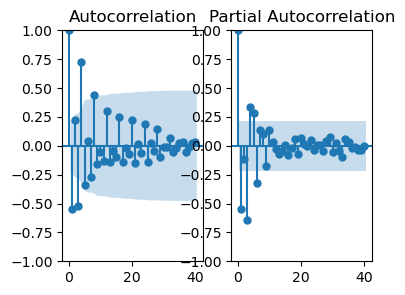

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import aic, bic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset (already done earlier)
file_path = r'C:\Users\MrLaptop\Desktop\jj.csv'
data = pd.read_csv(file_path)

# Convert 'date' to datetime and 'data' to float (if not already)
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

# Step 2: Differencing to make the data stationary (as done previously)
data['diff'] = data['data'].diff()

# Drop the NA values after differencing
data_diff = data.dropna(subset=['diff'])

# Step 3: ACF and PACF plots for determining p and q
plt.figure(figsize=(4 ,3))

plt.subplot(121)
plot_acf(data_diff['diff'], lags=40, ax=plt.gca())

plt.subplot(122)
plot_pacf(data_diff['diff'], lags=40, ax=plt.gca())

plt.show()



In [9]:
best_aic = np.inf
best_bic = np.inf
best_order = (0, 0, 0)

for p in range(1, 6):
    for q in range(1, 6):
        try:
            model = ARIMA(data['data'], order=(p, 1, q))  # 1 for differencing (d=1)
            model_fit = model.fit()
            current_aic = model_fit.aic
            current_bic = model_fit.bic

            # Track the best AIC and BIC
            if current_aic < best_aic:
                best_aic = current_aic
                best_bic = current_bic
                best_order = (p, 1, q)

            print(f"ARIMA({p}, 1, {q}) - AIC: {current_aic}, BIC: {current_bic}")
        except:
            continue

# Best ARIMA model order (p, 1, q)
print(f"Best ARIMA model: ARIMA{best_order} with AIC: {best_aic} and BIC: {best_bic}")




ARIMA(1, 1, 1) - AIC: 262.74165199666743, BIC: 269.9981738200572
ARIMA(1, 1, 2) - AIC: 248.8718750013871, BIC: 258.5472374325735


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 3) - AIC: 238.09263454517463, BIC: 250.18683758415762


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 4) - AIC: 190.50471534340645, BIC: 205.01775899018602
ARIMA(1, 1, 5) - AIC: 179.5388703174845, BIC: 196.47075457206068
ARIMA(2, 1, 1) - AIC: 264.71951432392984, BIC: 274.39487675511623


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 2) - AIC: 249.9617665856377, BIC: 262.0559696246207
ARIMA(2, 1, 3) - AIC: 223.43737872995783, BIC: 237.9504223767374


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 4) - AIC: 187.8153974333151, BIC: 204.7472816878913
ARIMA(2, 1, 5) - AIC: 181.32433378997848, BIC: 200.67505865235125


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 1) - AIC: 201.16126169786725, BIC: 213.25546473685023
ARIMA(3, 1, 2) - AIC: 170.40830630422104, BIC: 184.92134995100062


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) - AIC: 166.57163713576372, BIC: 183.50352139033993


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 4) - AIC: 148.5052564520015, BIC: 167.85598131437428
ARIMA(3, 1, 5) - AIC: 181.518846018798, BIC: 203.28841148896737


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(4, 1, 1) - AIC: 121.38196312846371, BIC: 135.8950067752433
ARIMA(4, 1, 2) - AIC: 121.458621466278, BIC: 138.3905057208542


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(4, 1, 3) - AIC: 119.9315407568518, BIC: 139.28226561922457


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(4, 1, 4) - AIC: 119.92243650146922, BIC: 141.6920019716386
ARIMA(4, 1, 5) - AIC: 119.55330307688445, BIC: 143.7417091548504


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(5, 1, 1) - AIC: 120.07043080675764, BIC: 137.00231506133383


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 1, 2) - AIC: 117.1895253754843, BIC: 136.5402502378571


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 1, 3) - AIC: 116.53456431164183, BIC: 138.3041297818112


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 1, 4) - AIC: 117.2428330389213, BIC: 141.4312391168873
ARIMA(5, 1, 5) - AIC: 119.24256016528562, BIC: 145.8498068510482
Best ARIMA model: ARIMA(5, 1, 3) with AIC: 116.53456431164183 and BIC: 138.3041297818112


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   84
Model:                 ARIMA(5, 1, 3)   Log Likelihood                 -49.267
Date:                Fri, 11 Apr 2025   AIC                            116.535
Time:                        10:30:25   BIC                            138.304
Sample:                             0   HQIC                           125.280
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7996      0.326     -2.455      0.014      -1.438      -0.161
ar.L2         -0.0307      0.055     -0.560      0.576      -0.138       0.077
ar.L3          0.0441      0.049      0.907      0.3

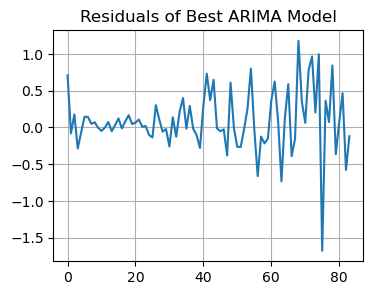

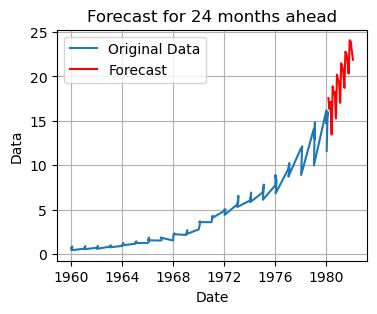

In [10]:
# Step 5: Fit the best ARIMA model
best_model = ARIMA(data['data'], order=best_order)
best_model_fit = best_model.fit()

# Step 6: Test the model performance (in-sample fitting and residuals)
print(best_model_fit.summary())

# Plot residuals
plt.figure(figsize=(4, 3))
plt.plot(best_model_fit.resid)
plt.title('Residuals of Best ARIMA Model')
plt.grid(True)
plt.show()

# Step 7: Forecasting 24 months into the future
forecast_steps = 24
forecast = best_model_fit.forecast(steps=forecast_steps)

# Step 8: Plot forecast results
forecast_index = pd.date_range(start=data['date'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:]

plt.figure(figsize=(4, 3))
plt.plot(data['date'], data['data'], label='Original Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title(f'Forecast for {forecast_steps} months ahead')
plt.xlabel('Date')
plt.ylabel('Data')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50


C:\Users\MrLaptop\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0960 - val_loss: 0.7100
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0735 - val_loss: 0.5858
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0528 - val_loss: 0.4766
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0384 - val_loss: 0.3809
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0300 - val_loss: 0.2980
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0197 - val_loss: 0.2290
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0172 - val_loss: 0.1732
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0166 - val_loss: 0.1330
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0171 - val_loss: 0.1073
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0171 - val_loss: 0.0923
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0163 - val_loss: 0.0872
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0166 - val_loss: 0.0876
Epoch 13/50
2/

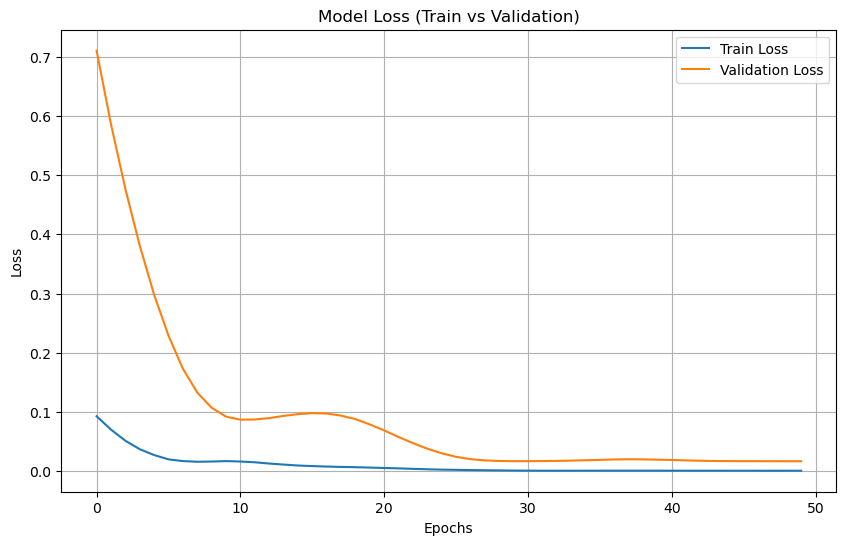

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
file_path = r'C:\Users\MrLaptop\Desktop\jj.csv'
data = pd.read_csv(file_path)

# Convert 'date' to datetime and 'data' to float
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

# Step 2: Preprocess Data - Use MinMaxScaler to scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['data'].values.reshape(-1, 1))

# Step 3: Prepare the dataset for RNN model
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 12  # Using 12 months as time step
X, y = create_dataset(data_scaled, time_step)

# Reshape X to be compatible with LSTM/GRU input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 4: Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 5: Define the RNN model (LSTM or GRU)
model = Sequential()

# Uncomment to use LSTM:
# model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Uncomment to use GRU:
model.add(GRU(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 7: Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Train vs Validation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Forecast the next 24 months
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert scaling for forecasted values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Step 9: Forecast future 24 months
last_data_point = data_scaled[-time_step:]
forecast_input = last_data_point.reshape(1, time_step, 1)

future_forecast = []
for _ in range(24):  # 24 months ahead forecast
    forecast_value = model.predict(forecast_input)
    future_forecast.append(forecast_value[0, 0])
    forecast_input = np.append(forecast_input[:, 1:, :], forecast_value.reshape(1, 1, 1), axis=1)

# Invert the future forecast scaling
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))




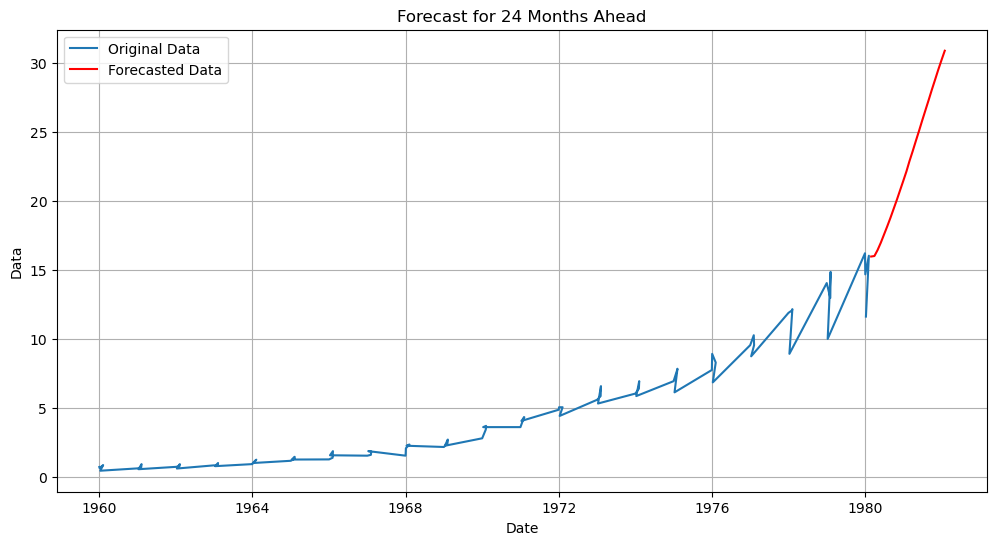

Mean Squared Error (MSE): 135.5793938581631
Mean Absolute Error (MAE): 11.470369598823456
Root Mean Squared Error (RMSE): 11.643856485639244
Mean Absolute Percentage Error (MAPE): 15.664336351822893


In [13]:
# Step 10: Plotting the results (original data + forecast)
forecast_index = pd.date_range(start=data['date'].iloc[-1], periods=25, freq='M')[1:]

plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['data'], label='Original Data')
plt.plot(forecast_index, future_forecast, label='Forecasted Data', color='red')
plt.title('Forecast for 24 Months Ahead')
plt.xlabel('Date')
plt.ylabel('Data')
plt.legend()
plt.grid(True)
plt.show()

# Step 11: Evaluation Metrics (for the test set)
mse = mean_squared_error(y_test, test_predict)
mae = mean_absolute_error(y_test, test_predict)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, test_predict)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Epoch 1/50


C:\Users\MrLaptop\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 692ms/step - loss: 0.0758 - val_loss: 0.5603
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0586 - val_loss: 0.4625
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0476 - val_loss: 0.3727
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0329 - val_loss: 0.2903
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0233 - val_loss: 0.2145
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0153 - val_loss: 0.1470
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0091 - val_loss: 0.0917
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0071 - val_loss: 0.0519
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0082 - val_loss: 0.0298
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0093 - val_loss: 0.0228
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0103 - val_loss: 0.0228
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0081 - val_loss: 0.0267
Epoch 13/50

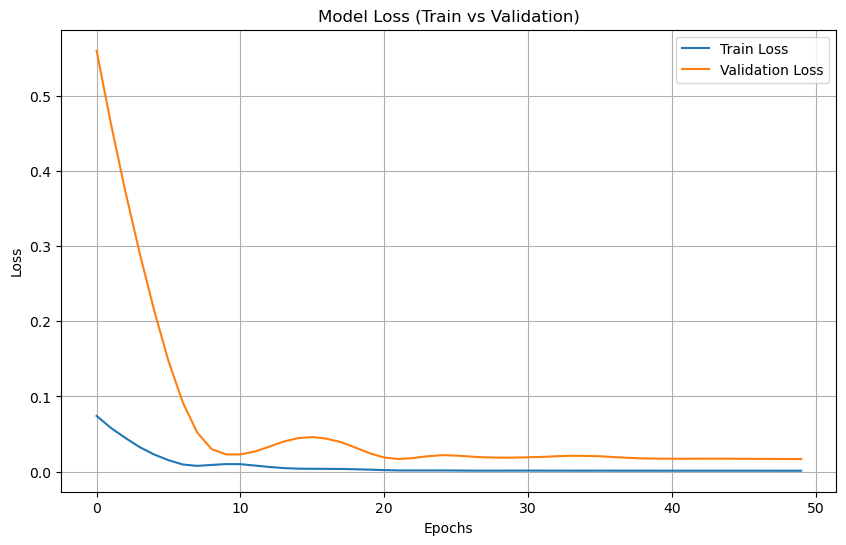

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Load the dataset
file_path =  r'C:\Users\MrLaptop\Desktop\jj.csv'
data = pd.read_csv(file_path)

# Convert 'date' to datetime and 'data' to float
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

# Step 2: Preprocess Data - Use MinMaxScaler to scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['data'].values.reshape(-1, 1))

# Step 3: Prepare the dataset for LSTM model
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 12  # Using 12 months as time step
X, y = create_dataset(data_scaled, time_step)

# Reshape X to be compatible with LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 4: Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 5: Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 7: Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Train vs Validation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Forecast the next 24 months
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert scaling for forecasted values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Step 9: Forecast future 24 months
last_data_point = data_scaled[-time_step:]
forecast_input = last_data_point.reshape(1, time_step, 1)

future_forecast = []
for _ in range(24):  # 24 months ahead forecast
    forecast_value = model.predict(forecast_input)
    future_forecast.append(forecast_value[0, 0])
    forecast_input = np.append(forecast_input[:, 1:, :], forecast_value.reshape(1, 1, 1), axis=1)

# Invert the future forecast scaling
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))



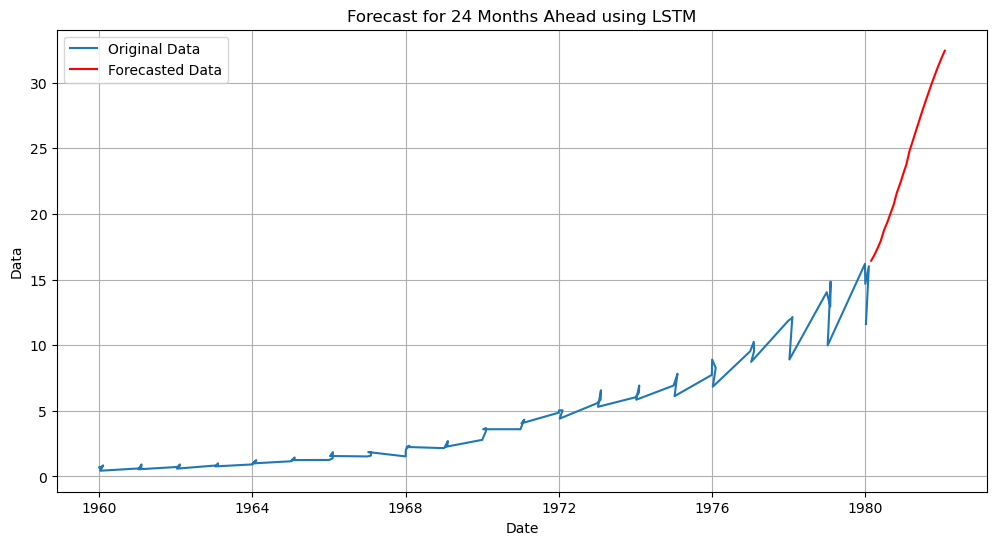

Mean Squared Error (MSE): 138.25795766881456
Mean Absolute Error (MAE): 11.573231130398977
Root Mean Squared Error (RMSE): 11.75831440593483
Mean Absolute Percentage Error (MAPE): 15.780454365082756


In [16]:
# Step 10: Plotting the results (original data + forecast)
forecast_index = pd.date_range(start=data['date'].iloc[-1], periods=25, freq='M')[1:]

plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['data'], label='Original Data')
plt.plot(forecast_index, future_forecast, label='Forecasted Data', color='red')
plt.title('Forecast for 24 Months Ahead using LSTM')
plt.xlabel('Date')
plt.ylabel('Data')
plt.legend()
plt.grid(True)
plt.show()

# Step 11: Evaluation Metrics (for the test set)
mse = mean_squared_error(y_test, test_predict)
mae = mean_absolute_error(y_test, test_predict)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, test_predict)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
